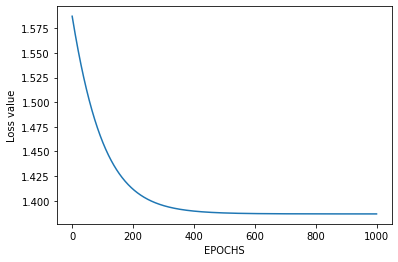

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# X = <X1, X2, X3, -1 (bias)>
x = np.array([[0,0,0,-1],[0,0,1,-1],[0,1,0,-1],[0,1,1,-1],[1,0,0,-1],[1,0,1,-1],[1,1,0,-1],[1,1,1,-1]], dtype=np.float64)
y = np.array([[0,1,1,0,1,0,0,1]]).T

class Perceptron:
    def __init__(self, train, hidden, outputs, target, lr=1, iters=5000):
        self.num_inputs = train.shape[1] 
        self.hidden = hidden
        self.output = outputs
        self.x = train
        self.y = target
        self.iters = iters
        self.lr = lr
        self.train_loss = list()
        self.w1 = np.random.uniform(size=(self.num_inputs, self.hidden))
        self.w2 = np.random.uniform(size=(self.hidden, self.output))
#         self.b1 = np.random.uniform(size=(self.hidden, 1))
#         self.b2 = np.random.uniform(size=(self.output, 1))
    
    def sigmoid(self,x):
        result = 1/(1+np.exp(-x))
#         result = (2 / (1 + np.exp(-x)) ) - 1  ## overflow encountered in exp error (couldn't fix it)
        return result

    def classify(self, x):
        z0 = np.dot(x, self.w1)         
        a0 = self.sigmoid(z0)               
        z1 = np.dot(a0,self.w2)

        ##a1 = x.reshape(x.shape[0], 1)
        ##z2 = np.dot(self.w1, a1) + self.b1
        ##a2 = self.sigmoid(z2)    
        ##z3 = np.dot(self.w2, a2) + self.b2
        ##a3 = self.sigmoid(z3)
        
        return self.sigmoid(z1) 

    def train(self):
        for __ in range(self.iters):
            #forward propagation
            z0 = np.dot(self.x, self.w1)  
            a0 = self.sigmoid(z0)         
            z1 = np.dot(a0,self.w2)       
            a1 = self.sigmoid(z1)         
            
            #backward propagation
            delta_w2 = (a1-self.y) * a1*(1-a1)             
            delta_w1 = np.dot(delta_w2, self.w2.T) * (1-a0)

            self.w1 -= self.lr*np.dot(self.x.T,delta_w1)   
            self.w2 -= self.lr*np.dot(a0.T,delta_w2)       
            
            #loss
            loss = -(1/self.num_inputs) * np.sum(y * np.log(a1) + (1 - y) * np.log(1 - a1))
            self.train_loss.append(loss)
    
    def plot(self):
        plt.plot(self.train_loss)
        plt.xlabel("EPOCHS")
        plt.ylabel("Loss value")
    
    def predict(self, _input):
        #adding bias
        _input.append(-1)
#         _input = np.asarray(_input)
        res = self.classify(_input)
        res = np.squeeze(res)
        
        if res>=0.5:
            print("For input", [i for i in _input], "output is 1")# ['{:.2f}'.format(i) for i in x])
        else:
            print("For input", [i for i in _input], "output is 0")

        
xor = Perceptron(train=x, hidden=4, outputs=1, target=y, lr=0.01, iters=1000)
xor.train()
xor.plot()